In [49]:
from __future__ import division
from past.utils import old_div
from sippy import *
import numpy as np
from sippy import functionset as fset
from sippy import functionsetSIM as fsetSIM
import matplotlib.pyplot as plt
from matplotlib import rcParams
import control as ct

rcParams['figure.figsize'] = (9.0, 5.0)
%matplotlib nbagg

## Define sampling time and time vector

In [50]:
ts = 1.0 #[s]
tfin = 500 #[s]
npts = int(tfin / ts) + 1
Time = np.linspace(0, tfin, npts)

## Define pseudo random binary sequence as input signal and white noise as noise signal

In [51]:
U = np.zeros((1, npts))
switch_probability = 0.05 # [0..1] 
U[0] = fset.PRBS_seq(npts, switch_probability)
white_noise_variance = [0.15]
noise = fset.white_noise_var(npts, white_noise_variance)

## Define the system

In [52]:
A = np.array([[0.89, 0.], [0., 0.45]])
B = np.array([[0.3], [2.5]])
C = np.array([[0.7, 1.]])
D = np.array([[0.0]])
sys = ct.ss(A, B, C, D)
display(sys)

A = [[0.89 0.  ]
 [0.   0.45]]

B = [[0.3]
 [2.5]]

C = [[0.7 1. ]]

D = [[0.]]

## Time responses

<IPython.core.display.Javascript object>


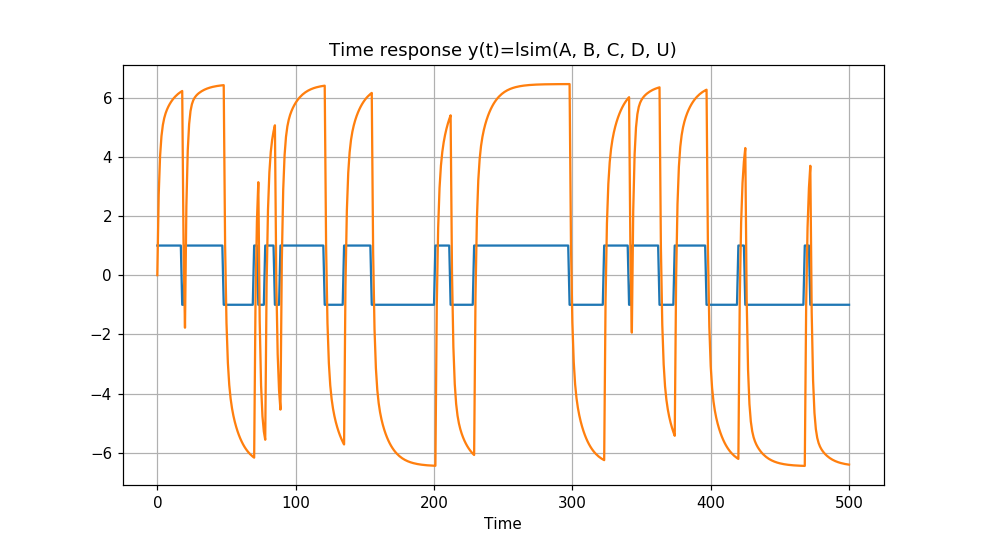

In [53]:
X, Y = fsetSIM.SS_lsim_process_form(A, B, C, D, U)
plt.figure(1)
plt.plot(Time, U[0])
plt.plot(Time, Y[0])
plt.xlabel("Time")
plt.title("Time response y(t)=lsim(A, B, C, D, U)")
plt.grid()

## Output with noise

<IPython.core.display.Javascript object>


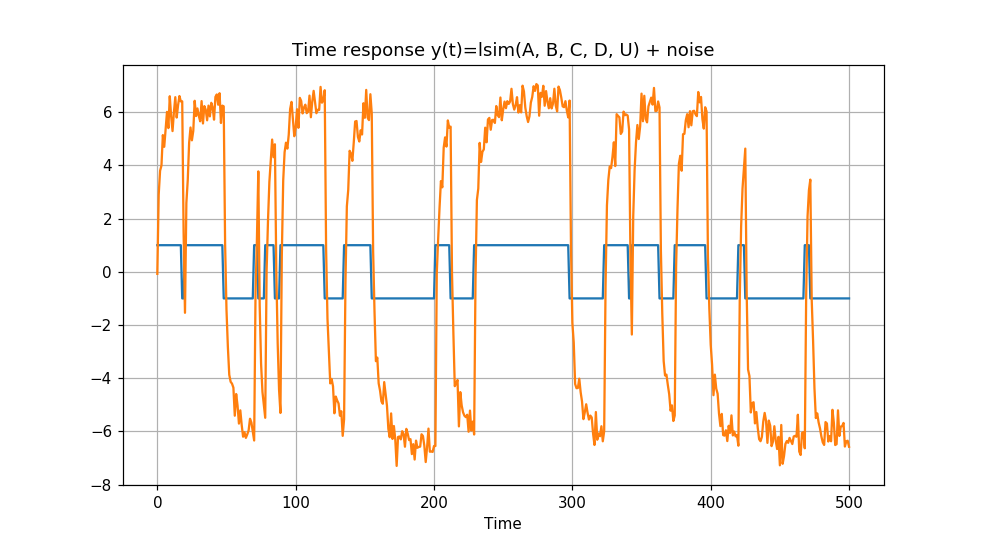

In [54]:
Y_tot = Y + noise
plt.figure(2)
plt.plot(Time, U[0])
plt.plot(Time, Y_tot[0])
plt.xlabel("Time")
plt.title("Time response y(t)=lsim(A, B, C, D, U) + noise")
plt.grid()

## Perform system identification from collected data

In [59]:
method = 'N4SID'
sys_order = 2
sys_id = system_identification(Y_tot, U, method, SS_fixed_order=sys_order)
X_id, Y_id = fsetSIM.SS_lsim_process_form(sys_id.A, sys_id.B, sys_id.C, sys_id.D, U, sys_id.x0)

## Check that output of the identified system is consistent

<IPython.core.display.Javascript object>


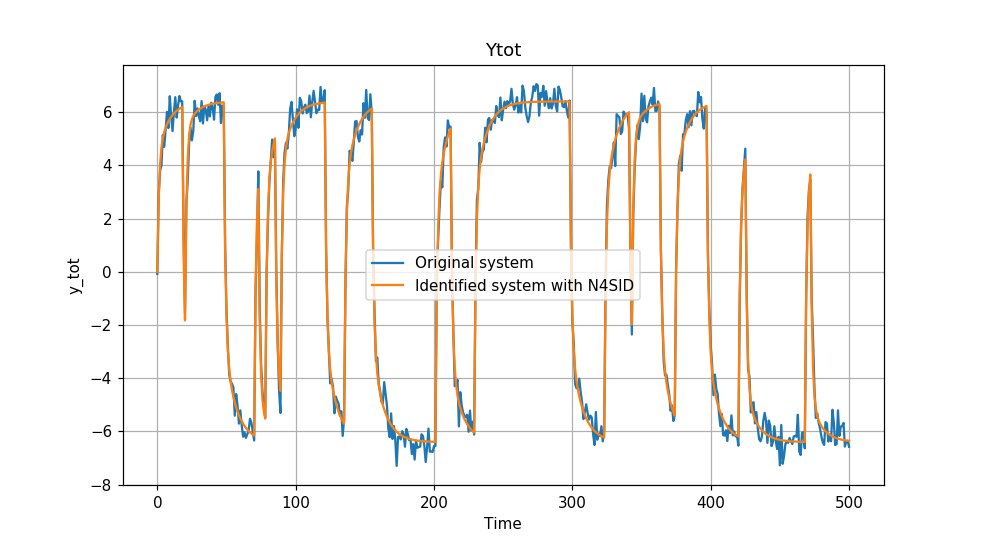

In [60]:
plt.figure(3)
plt.plot(Time, Y_tot[0])
plt.plot(Time, Y_id[0])
plt.ylabel("y_tot")
plt.grid()
plt.xlabel("Time")
plt.title("Ytot")
plt.legend(['Original system', 'Identified system with ' + method])
plt.show()